# Análise de Inadimplência no Conjunto de Dados Credit Card Default com Regressão Logística

**Objetivos**
1. Implementar uma regressão logística para prever a inadimplência (default) com base nas
variáveis balance, student, income e outras variáveis relevantes.
2. Analisar os coeficientes do modelo e a significância estatística das variáveis.
3. Avaliar o desempenho do modelo usando métricas de classificação e interpretação dos
resultados

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 9.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e53fdf58d7c6db81750ea0f38eeeba9ca8453deb41ad90b4d60d617384302fb4
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
# Conjunto de dados: Credit Card Default Data Set.
from ISLP import load_data
# Carregar os dados
df = load_data('Default')

df.rename(columns={
    'default': 'target',
    'student': 'estudante',
    'balance': 'saldo médio',
    'income': 'renda anual'
}, inplace=True)

# Exibir as primeiras linhas do dataframe
df.head()

,target,estudante,saldo médio,renda anual
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
# Resumo estatístico e distribuição das variáveis balance, student, income
df.describe()

,saldo médio,renda anual
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [ ]:
# Tratamento dos dados
# Verificar valores ausentes
print("Valores ausentes em cada coluna:")
print(df.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Resumo estatístico para variáveis categóricas
print("\nDistribuição das variáveis categóricas:")
print(df['estudante'].value_counts())

Valores ausentes em cada coluna:
target         0
estudante      0
saldo médio    0
renda anual    0
dtype: int64

Tipos de dados:
target         category
estudante      category
saldo médio     float64
renda anual     float64
dtype: object

Distribuição das variáveis categóricas:
estudante
No     7056
Yes    2944
Name: count, dtype: int64


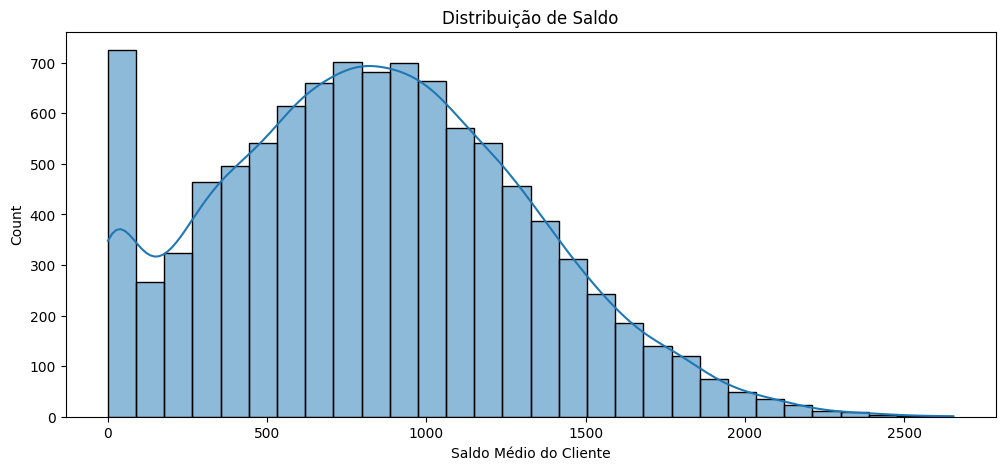

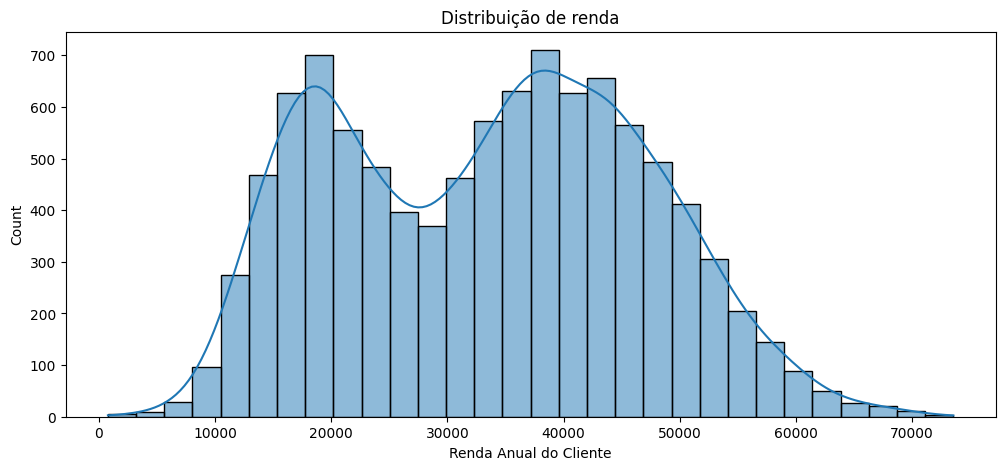

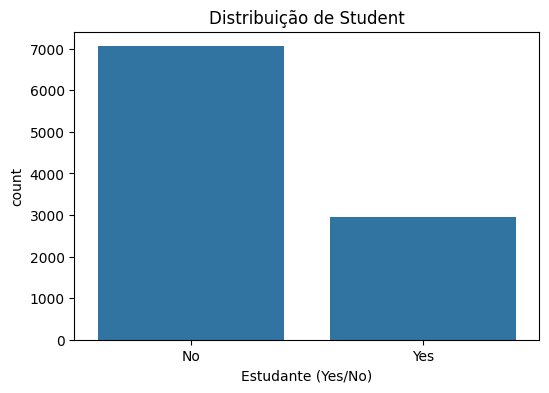

target       No  Yes
estudante           
No         6850  206
Yes        2817  127


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Distribuição de 'balance'
plt.figure(figsize=(12, 5))
sns.histplot(df['saldo médio'], bins=30, kde=True)
plt.title("Distribuição de Saldo")
plt.xlabel("Saldo Médio do Cliente")
plt.show()

# Distribuição de 'income'
plt.figure(figsize=(12, 5))
sns.histplot(df['renda anual'], bins=30, kde=True)
plt.title("Distribuição de renda")
plt.xlabel("Renda Anual do Cliente")
plt.show()

# Distribuição de 'student'
plt.figure(figsize=(6, 4))
sns.countplot(x='estudante', data=df)
plt.title("Distribuição de Student")
plt.xlabel("Estudante (Yes/No)")
plt.show()

tabela_contingencia = pd.crosstab(df['estudante'], df['target'])
print(tabela_contingencia)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Preparação dos dados
# Converter a variável 'default' para binária (1 para Yes, 0 para No)
df['target'] = df['target'].apply(lambda x: 1 if x == 'Yes' else 0)
# Converter a variável 'student' para binária
df['estudante'] = df['estudante'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separando as variáveis explicativas (X) e a variável alvo (y)
X = df[['saldo médio', 'renda anual', 'estudante']]
y = df['target']

# Dividindo os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando o resultado
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (7000, 3)
Tamanho do conjunto de teste: (3000, 3)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Definindo as variáveis preditoras e a variável alvo
X = df[['saldo médio', 'estudante', 'renda anual']]
y = df['target']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Verificando a nova proporção
print("Proporção de classes após o oversampling:")
print(y_train.value_counts(normalize=True))


Proporção de classes após o oversampling:
target
0    0.501219
1    0.498781
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinar o modelo com apenas uma variável preditora por vez e depois com todas juntas
variaveis = ['saldo médio', 'estudante', 'renda anual']

# Dicionário para armazenar os resultados de cada modelo
resultados = {}

for var in variaveis:
    # Definindo o conjunto de treino com uma única variável preditora
    X_train_var = X_train[[var]]
    X_test_var = X_test[[var]]

    # Criando e treinando o modelo de regressão logística
    modelo = LogisticRegression()
    modelo.fit(X_train_var, y_train)

    # Prevendo no conjunto de teste
    y_pred = modelo.predict(X_test_var)

    # Calculando a acurácia
    acuracia = accuracy_score(y_test, y_pred)
    resultados[var] = acuracia
    print(f"Acurácia usando '{var}' como preditor: {acuracia:.4f}")

# Treinando o modelo com todas as variáveis preditoras juntas
modelo_todas = LogisticRegression()
modelo_todas.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred_todas = modelo_todas.predict(X_test)

# Calculando a acurácia
acuracia_todas = accuracy_score(y_test, y_pred_todas)
resultados['todas'] = acuracia_todas
print(f"Acurácia usando todas as variáveis como preditoras: {acuracia_todas:.4f}")

Acurácia usando 'saldo médio' como preditor: 0.8785
Acurácia usando 'estudante' como preditor: 0.5468
Acurácia usando 'renda anual' como preditor: 0.5423
Acurácia usando todas as variáveis como preditoras: 0.8814


In [ ]:
from sklearn.linear_model import LogisticRegression

# Treine o modelo com todas as variáveis
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Exiba os coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo.coef_[0]
})
print(coeficientes)

      Variável  Coeficiente
0  saldo médio     0.005674
1    estudante    -0.645219
2  renda anual     0.000004


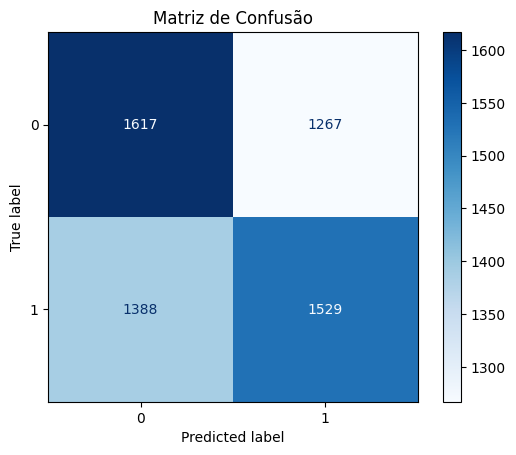

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Previsões com o modelo treinado usando todas as variáveis como preditoras
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades de inadimplência

# Alterando o limiar para 0.3
y_pred_0_3 = (y_prob > 0.3).astype(int)

# Calculando as métricas
acuracia_0_3 = accuracy_score(y_test, y_pred_0_3)
precisao_0_3 = precision_score(y_test, y_pred_0_3)
recall_0_3 = recall_score(y_test, y_pred_0_3)
f1_0_3 = f1_score(y_test, y_pred_0_3)
matriz_confusao_0_3 = confusion_matrix(y_test, y_pred_0_3)

print("Métricas com limiar de decisão 0.3:")
print(f"Acurácia: {acuracia_0_3:.4f}")
print(f"Precisão: {precisao_0_3:.4f}")
print(f"Revocação (Recall): {recall_0_3:.4f}")
print(f"F1 Score: {f1_0_3:.4f}")
print("Matriz de Confusão:")
print(matriz_confusao_0_3)


Métricas com limiar de decisão 0.3:
Acurácia: 0.8607
Precisão: 0.8082
Revocação (Recall): 0.9479
F1 Score: 0.8725
Matriz de Confusão:
[[2228  656]
 [ 152 2765]]
